In [1]:
!pip install reportlab
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

In [2]:
# Bike Model
df_b=pd.read_csv("RF_Intersections_bike_final.csv", encoding= 'unicode_escape')

X = df_b[['Average_Daily_Zone_Traffic_(StL_Volume)', 'Total_road_network_density', 'Shoulder',
        'Total_land_area_(acres)_that_is_not_protected_from_development_(i.e.,_not_a_park,_natural_area_or_conservation_area)', 
        'Total_land_area_(acres)', 'Percent_medium_wage_workers_(workplace)', 
        'Gross_industrial_(8-tier)_employment_density_(jobs/acre)_on_unprotected_land', 
        'Percent_of_two-plus-car_households_in_CBG,_2018',  
        'Gross_residential_density_(HU/acre)_on_unprotected_land', 'Housing_units,_2018', 
        'Employment_and_household_entropy', 
        'Percent_of_one-car_households_in_CBG,_2018', '8-tier_employment_entropy_(denominator_set_to_the_static_8_employment_types_in_the_CBG)', 
        'Median_type', 'Number_of_lanes', 'National_functional_classification', 'One_way']]

y = df_b['Totals_x2']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# y_scaled = scaler.fit_transform(y)
clf = RandomForestRegressor(n_estimators=10)
clf = clf.fit(X_scaled, y)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
clf = RandomForestRegressor(n_estimators=10)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
r2 = r2_score(y_train, y_pred_train)
print("R-squared score for training set:", r2)
r2_test = r2_score(y_test, y_pred_test)
print("R-squared score for test set:", r2_test)

R-squared score for training set: 0.9974725493828908
R-squared score for test set: 0.9944123932721729


In [48]:
importances = clf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)
print(feature_importances_df)
top_features = feature_importances_df.head(5)['Feature'].tolist()
print("Top 5 important features:")
for feature in top_features:
    print(feature)

                                              Feature  Importance
0             Average_Daily_Zone_Traffic_(StL_Volume)    0.363386
14                                    Number_of_lanes    0.286127
1                          Total_road_network_density    0.139767
6   Gross_industrial_(8-tier)_employment_density_(...    0.080153
5             Percent_medium_wage_workers_(workplace)    0.056503
11         Percent_of_one-car_households_in_CBG,_2018    0.024755
16                                            One_way    0.014577
8   Gross_residential_density_(HU/acre)_on_unprote...    0.005362
12  8-tier_employment_entropy_(denominator_set_to_...    0.005106
15                 National_functional_classification    0.005046
3   Total_land_area_(acres)_that_is_not_protected_...    0.004286
2                                            Shoulder    0.003764
7     Percent_of_two-plus-car_households_in_CBG,_2018    0.002657
9                                 Housing_units,_2018    0.002493
4         

In [54]:
# Refitting the model to include only the top 10 features

# Filtering and scaling
top_features = feature_importances_df.head(10)['Feature'].tolist()
X_top = X[top_features]
X_top_scaled = scaler.fit_transform(X_top)

# Splitting dataset
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)

# Refitting
clf_top = RandomForestRegressor(n_estimators=10)
clf_top.fit(X_train_top, y_train)

# Predicting
y_pred_train_top = clf_top.predict(X_train_top)
y_pred_test_top = clf_top.predict(X_test_top)

# Calculating r2
r2_train_top = r2_score(y_train, y_pred_train_top)
print("R-squared score for training set (top 10 features):", r2_train_top)

r2_test_top = r2_score(y_test, y_pred_test_top)
print("R-squared score for test set (top 10 features):", r2_test_top)

R-squared score for training set (top 10 features): 0.9981915904904547
R-squared score for test set (top 10 features): 0.99402652297929


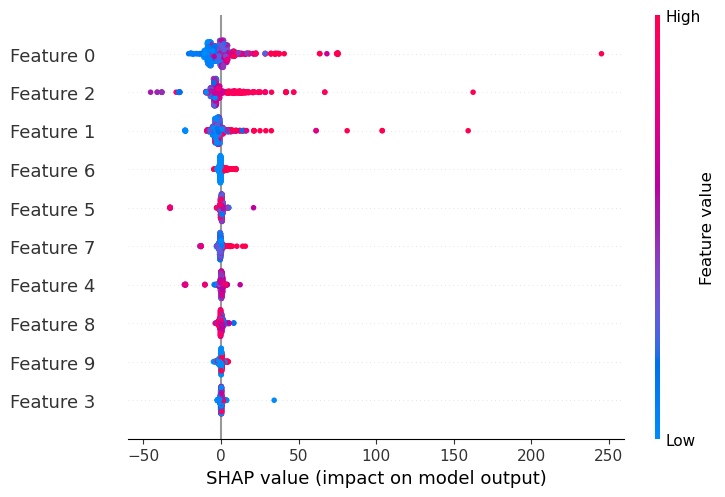

In [55]:
# Calculating SHAP values for bicycle model

import shap

# Creating SHAP explainer
explainer = shap.Explainer(clf_top, X_test_top)

# Calculating SHAP values for all test instances
shap_values = explainer(X_test_top)

# Plotting the beeswarm plot for all instances
shap.plots.beeswarm(shap_values)

In [135]:
# Pedestrian Model
df_p=pd.read_csv("RF_Intersections_ped_final.csv", encoding= 'unicode_escape')

X1 = df_p[['Average_Daily_Zone_Traffic_(StL_Volume)', 'Population,_2018', 'Households_(occupied_housing_units),_2018', 
           'Percent_of_zero-car_households_in_CBG,_2018', 'Total_employment,_2017', 'Shoulder', 'Median_type', 
           'Number_of_lanes', 'National_functional_classification', 'One_way']]
# X_1 = df1[['Population, 2018', 'Households (occupied housing units), 2018', 'Percent of zero-car households in CBG, 2018', 'Total employment, 2017']]
y1 = df_p['Totals_x2']
scaler1 = MinMaxScaler()
X_scaled1 = scaler1.fit_transform(X1)
clf1 = RandomForestRegressor(n_estimators=10)
clf1 = clf1.fit(X_scaled1, y1)

In [145]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled1, y1, test_size=0.2, random_state=42)
clf1 = RandomForestRegressor(n_estimators=10)
clf1.fit(X_train1, y_train1)
y_pred1_train = clf1.predict(X_train1)
y_pred1_test = clf1.predict(X_test1)
r2 = r2_score(y_train1, y_pred1_train)
print("R-squared score for train set:", r2)
r2_test = r2_score(y_test1, y_pred1_test)
print("R-squared score for test set:", r2_test)

R-squared score for train set: 0.9968223233802836
R-squared score for test set: 0.9893526354146739


In [146]:
importances1 = clf1.feature_importances_
feature_importances_df1 = pd.DataFrame({'Feature': X1.columns, 'Importance': importances1})
feature_importances_df1 = feature_importances_df1.sort_values('Importance', ascending=False)
print(feature_importances_df1)
top_features1 = feature_importances_df1.head(5)['Feature'].tolist()
print("Top 5 important features:")
for feature in top_features1:
    print(feature)

                                       Feature  Importance
0      Average_Daily_Zone_Traffic_(StL_Volume)    0.667925
7                              Number_of_lanes    0.113595
3  Percent_of_zero-car_households_in_CBG,_2018    0.081588
1                             Population,_2018    0.045643
4                       Total_employment,_2017    0.031554
6                                  Median_type    0.027066
8           National_functional_classification    0.018746
9                                      One_way    0.008301
2    Households_(occupied_housing_units),_2018    0.005376
5                                     Shoulder    0.000207
Top 5 important features:
Average_Daily_Zone_Traffic_(StL_Volume)
Number_of_lanes
Percent_of_zero-car_households_in_CBG,_2018
Population,_2018
Total_employment,_2017


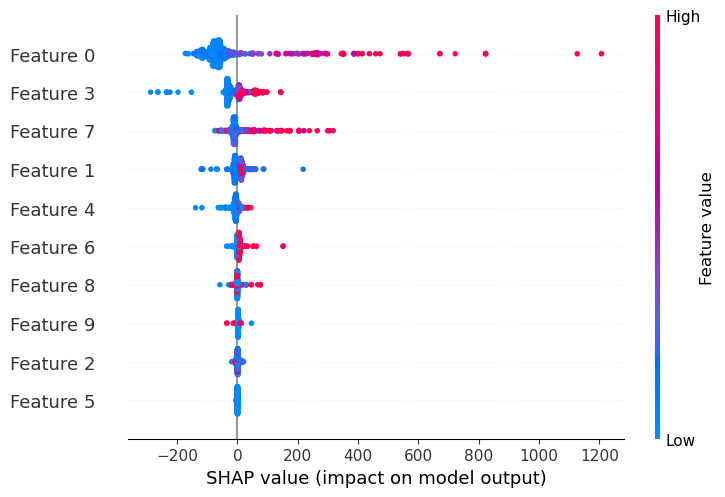

In [134]:
# Calculating SHAP values for pedestrian model

import shap

# Creating SHAP explainer
explainer = shap.TreeExplainer(clf1)

# Calculating SHAP values for all test instances
shap_values = explainer(X_test1, check_additivity=False)

# Plotting the beeswarm plot for all instances
shap.plots.beeswarm(shap_values)